# UCI SECOM Dataset

#### Semiconductor manufacturing process dataset                                                      |                        Abhishek Satapathy 17BCE1326

## Imports

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df = pd.read_csv("../Datasets/uci-semcom/uci-secom.csv")

In [129]:
df.head()
df = df.drop("Time",axis=1)

In [130]:
df.isnull().any().any()

True

## Data Exploration

In [131]:
df = df.replace(np.NaN, 0)

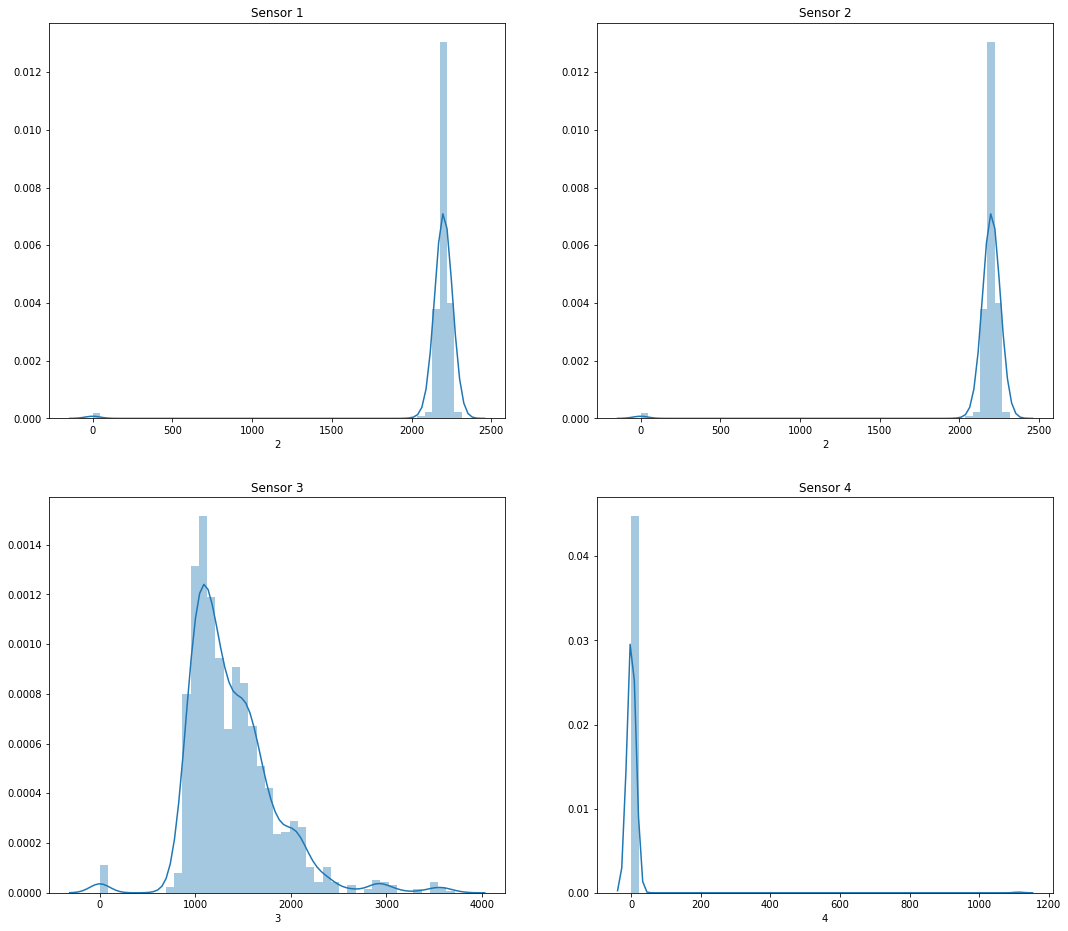

In [132]:
plt.rcParams['figure.figsize'] = (18, 16)

plt.subplot(2, 2, 1)
sns.distplot(df['2'])
plt.title('Sensor 1')

plt.subplot(2, 2, 2)
sns.distplot(df['2'])
plt.title('Sensor 2')

plt.subplot(2, 2, 3)
sns.distplot(df['3'])
plt.title('Sensor 3')

plt.subplot(2, 2, 4)
sns.distplot(df['4'])
plt.title('Sensor 4')

plt.show()

General trend in different sensor values from the dataset

In [133]:
from sklearn.preprocessing import Imputer 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [134]:
df['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

There is a high number of failed items hence possible that our model may be biased towards failing

## Data Preprocessing

In [135]:
x = df.iloc[:, 1:-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 0)

/home/maybeabhishek/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [136]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

#### Using Decision Tree Model to classify whether semiconductor will fail or not

In [137]:
model = DecisionTreeClassifier()
model.fit(x_train_std, y_train)
y_pred_lr = model.predict(x_test_std)

In [138]:
print('accuracy score', accuracy_score(y_pred_lr, y_test))
cm = confusion_matrix(y_pred_lr, y_test)
cm

accuracy score 0.8662420382165605


array([[402,  20],
       [ 43,   6]])

We get an accuracy score of 86% and we can see the confusion matrix to check the positives and negatives which have been determined. Although the accuracy is high, 43 of correct semiconductors were wrongly classified. 

In [139]:
X = df.drop("Pass/Fail",axis=1)

## Using PCA for dimensionality reduction

In [142]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [143]:
X_reduced.shape

(1567, 6)

In [144]:
print(np.sum(pca.explained_variance_ratio_))

0.9613311566535635


In [145]:
x_train, x_test, y_train, y_test = train_test_split(X_reduced, y, train_size = 0.7, random_state = 0)

/home/maybeabhishek/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Using the reduced features to test our model

In [146]:
model = DecisionTreeClassifier()
model.fit(x_train_std, y_train)
y_pred_lr = model.predict(x_test_std)
print('accuracy score', accuracy_score(y_pred_lr, y_test))
cm = confusion_matrix(y_pred_lr, y_test)
cm

accuracy score 0.8874734607218684


array([[411,  19],
       [ 34,   7]])

Accuracy increased by 2% and we can see that a lot of the wrongly classified columns have been correctly classified. 

## Seeing our DT model features for feature importance

In [147]:
model.feature_importances_

array([0.        , 0.04028794, 0.        , 0.        , 0.        ,
       0.02588031, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00192178, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01314218,
       0.00815825, 0.        , 0.        , 0.        , 0.        ,
       0.00678243, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02815049,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05998867, 0.        ,
       0.        , 0.        , 0.02329228, 0.03491981, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Plotting Decision Tree's Important Features

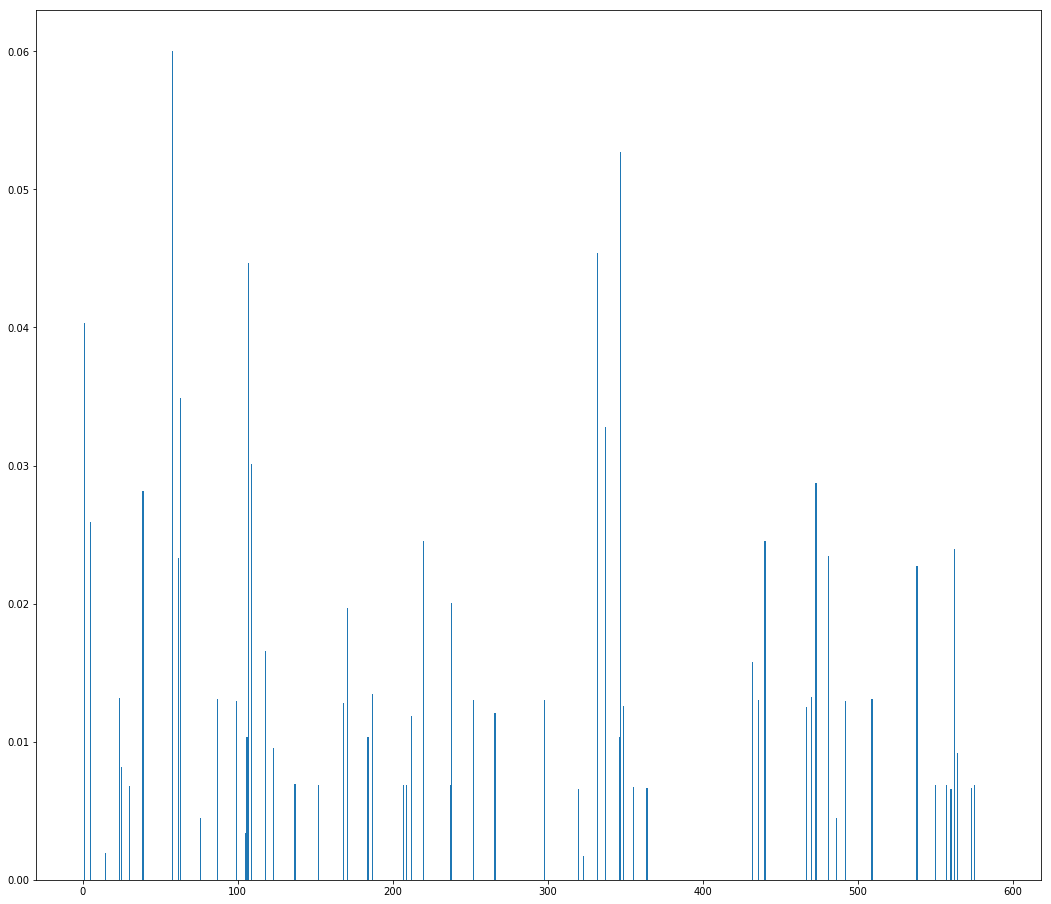

In [148]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

We can see that even DT has around 5-6 features which have high importance just as the PCA. They both do a good job in identifying and extracting the imoirtant features in a given dataset

## Using LDA to improve classification

In [150]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(x_train_std, y_train)
y_pred_lr = model.predict(x_test_std)
print('accuracy score', accuracy_score(y_pred_lr, y_test))
cm = confusion_matrix(y_pred_lr, y_test)
cm

accuracy score 0.8662420382165605


/home/maybeabhishek/.local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


array([[403,  21],
       [ 42,   5]])

The performance of the LDA still remains the same with a base accuracy of 86%. This can be improved by tweaking hyperparameters or using a better model